In [87]:
import numpy as np
import pandas as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [88]:
dataset = pd.read_csv('indian_liver_patient.csv')

In [89]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Prints the information or summary of the dataframe.

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


# Preprocessing
## Missing Values

Count the total number of missing values in the data set

In [91]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

## 'fillna', fills all the missing values with it's mean.
## So, all the missing values are going to be filled by the mean.

In [92]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].mean())

In [93]:
dataset.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

# Encoding

## Encode the gender column and re-encode the dataset column.
## The function takes in the dataset, a column and a positive value which we want it to be 1, and the other to be 0.
## Line 2: make a copy of the dataset so that I don't modify it in place.
## Line 3: I will then apply a lambda function that turns x into 1 if x = to the positive value, else it's 0

In [94]:
def binary_encode(dataset, column, positive_value):
    dataset = dataset.copy()
    dataset[column] = dataset[column].apply(lambda x: 1 if x == positive_value else 0)
    return dataset

In [95]:
dataset = binary_encode(dataset, 'Gender', 'Male')

Change the labels to binary forms of 0 and 1, instead of 1 and 2

In [96]:
dataset = binary_encode(dataset, 'Dataset', 1)

# Splitting and Scaling

In [97]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [98]:
y = dataset['Dataset']
X = dataset.drop('Dataset', axis = 1)

In [99]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [101]:
X.shape

(583, 10)

In [102]:
y.sum() / len(y)

0.7135506003430532

In [103]:
all_models= {
    'LogisticRegrsssion': LogisticRegression(),
    'MLP Classifier' : MLPClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Support Vector Machine' : SVC(),
    'SGDC Classifier' : SGDClassifier()
   
}
for name,model in all_models.items():
    model.fit(X_train,y_train)
    print(name+ ': trained')

LogisticRegrsssion: trained
MLP Classifier: trained
RandomForestClassifier: trained
GaussianNB: trained
KNeighborsClassifier: trained
Decision Tree Classifier: trained
Support Vector Machine: trained
SGDC Classifier: trained


C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [104]:
for name,model in all_models.items():
    print(name+ ": {:.2f}%".format(model.score(X_test,y_test) * 100))

LogisticRegrsssion: 70.86%
MLP Classifier: 65.71%
RandomForestClassifier: 71.43%
GaussianNB: 56.57%
KNeighborsClassifier: 61.14%
Decision Tree Classifier: 68.00%
Support Vector Machine: 68.57%
SGDC Classifier: 59.43%


In [105]:
# from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
prediction_y = log_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.48      0.32      0.39        50
           1       0.76      0.86      0.81       125

    accuracy                           0.71       175
   macro avg       0.62      0.59      0.60       175
weighted avg       0.68      0.71      0.69       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


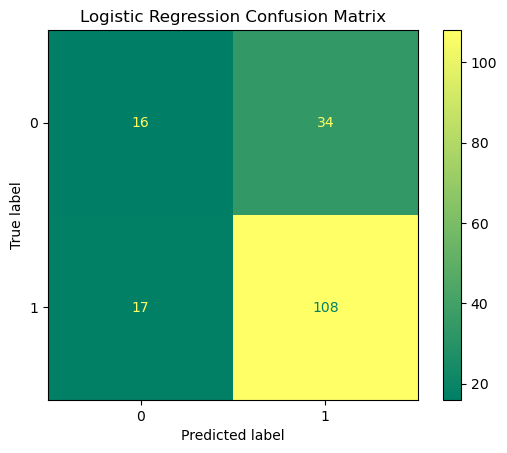

In [132]:
plot_confusion_matrix(log_model, X_test, y_test, cmap = 'summer')
plt.title ('Logistic Regression Confusion Matrix')
plt.savefig("Logistic Regression.png")

In [107]:
MLP_model = MLPClassifier()
MLP_model.fit(X_train, y_train)
prediction_y = MLP_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.41      0.38      0.40        50
           1       0.76      0.78      0.77       125

    accuracy                           0.67       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.66      0.67      0.66       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


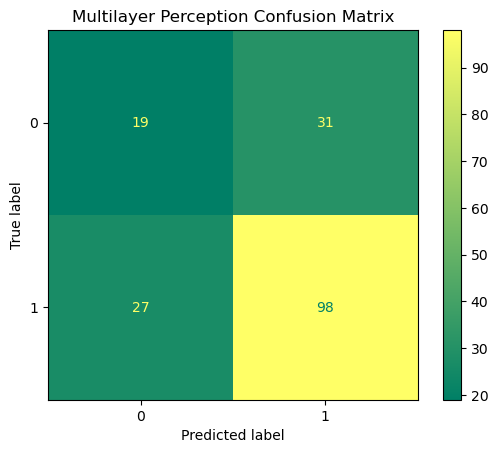

In [133]:
plot_confusion_matrix(MLP_model, X_test, y_test, cmap = 'summer')
plt.title ('Multilayer Perception Confusion Matrix')
plt.savefig('Multilayer Perception.png')

In [109]:
RFC_model = RandomForestClassifier()
RFC_model.fit(X_train, y_train)
prediction_y = RFC_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.44      0.30      0.36        50
           1       0.75      0.85      0.80       125

    accuracy                           0.69       175
   macro avg       0.60      0.57      0.58       175
weighted avg       0.66      0.69      0.67       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


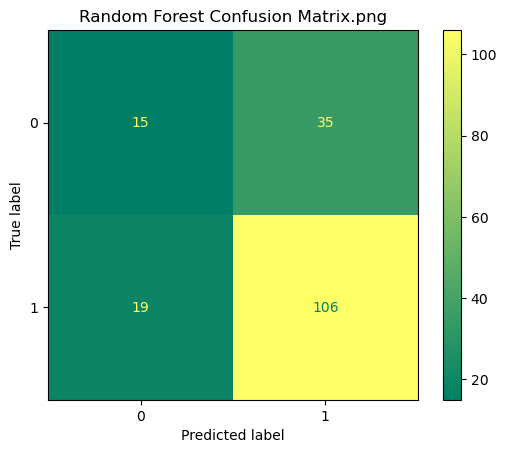

In [134]:
plot_confusion_matrix(RFC_model, X_test, y_test, cmap = 'summer')
plt.title ('Random Forest Confusion Matrix.png')
plt.savefig ("Random Forest")

In [113]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
prediction_y = GNB_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.39      0.92      0.55        50
           1       0.93      0.42      0.58       125

    accuracy                           0.57       175
   macro avg       0.66      0.67      0.57       175
weighted avg       0.78      0.57      0.57       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


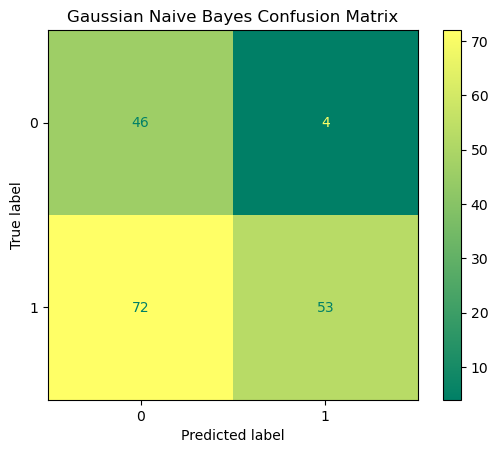

In [135]:
plot_confusion_matrix(GNB_model, X_test, y_test, cmap = 'summer')
plt.title ('Gaussian Naive Bayes Confusion Matrix')
plt.savefig("Gaussian Naive Bayes.png")

In [75]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
prediction_y = KNN_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42        51
           1       0.76      0.77      0.77       124

    accuracy                           0.67       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.66      0.67      0.67       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


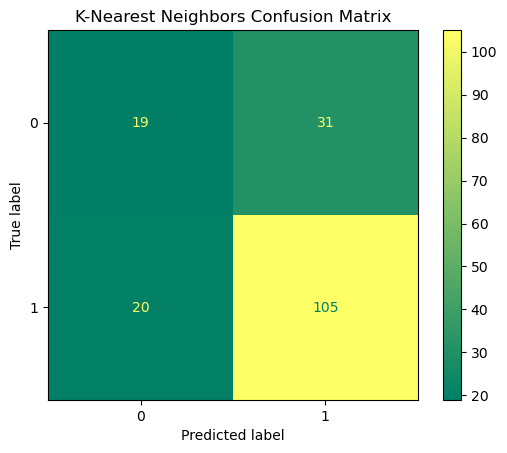

In [136]:
plot_confusion_matrix(KNN_model, X_test, y_test, cmap = 'summer')
plt.title ('K-Nearest Neighbors Confusion Matrix')
plt.savefig("K-Nearest Neighbors.png")

In [76]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)
prediction_y = DTC_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.44      0.39      0.42        51
           1       0.76      0.80      0.78       124

    accuracy                           0.68       175
   macro avg       0.60      0.60      0.60       175
weighted avg       0.67      0.68      0.67       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


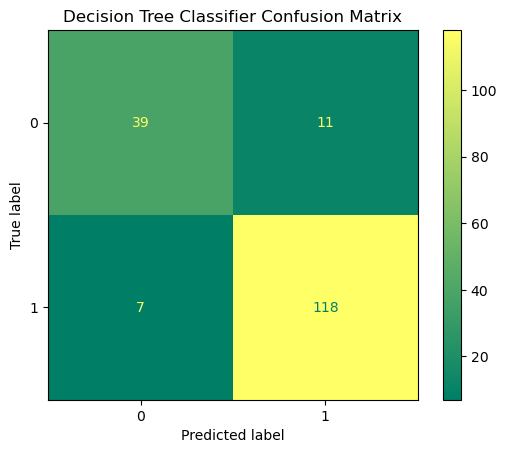

In [137]:
plot_confusion_matrix(DTC_model, X_test, y_test, cmap = 'summer')
plt.title ('Decision Tree Classifier Confusion Matrix')
plt.savefig('Decision Tree Classifier.png')

In [77]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
prediction_y = SVC_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.71      1.00      0.83       124

    accuracy                           0.71       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.50      0.71      0.59       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


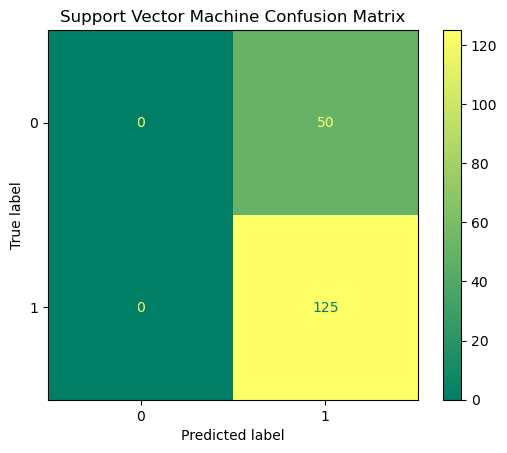

In [139]:
plot_confusion_matrix(SVC_model, X_test, y_test, cmap = 'summer')
plt.title ('Support Vector Machine Confusion Matrix')
plt.savefig('Support Vector Machine.png')

In [80]:
SGDC_model = SGDClassifier()
SGDC_model.fit(X_train, y_train)
prediction_y = SGDC_model.predict(X_test)

print(classification_report(y_test, prediction_y))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42        51
           1       0.76      0.77      0.77       124

    accuracy                           0.67       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.66      0.67      0.67       175



C:\Users\Professor Liu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


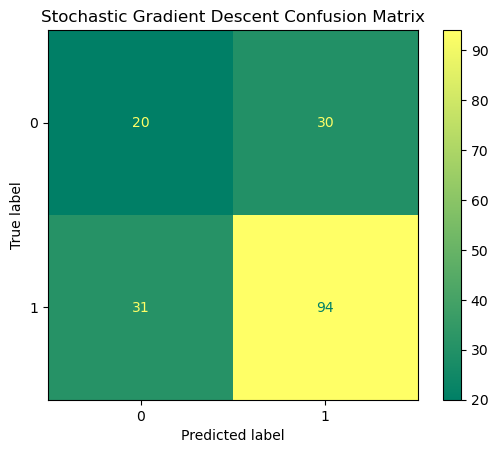

In [141]:
plot_confusion_matrix(SGDC_model, X_test, y_test, cmap = 'summer')
plt.title ('Stochastic Gradient Descent Confusion Matrix')
plt.savefig('Stochastic Gradient Descent.png')